
Name = Kunal Manjare

Status = Intern

Organisation = The Sparks Foundation

Task -3: Exploratory Data Analysis on SampleSuperStore.




Importing libraries and reading the data.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv('SampleSuperstore.csv')
df

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [4]:
df.shape

(9994, 13)

Cleaning  the data.

In [5]:
df.drop(['Country'], axis = 1)

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [6]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


Column wise grouping the data.

In [11]:
df[['Sales','Quantity','Profit']].groupby(['Profit'],as_index=True).sum().sort_values(by='Quantity',ascending=True)

,Sales,Quantity
Profit,,
3.5490,70.980,1
129.9974,499.990,1
31.4975,125.990,1
-1.4016,0.876,1
11.0544,39.480,1
...,...,...
6.2208,557.280,86
5.4432,497.664,96
9.3312,738.720,114


In [ ]:
df[['Sales', 'Discount']].groupby(['Sales'], as_index=True).sum().sort_values(by='Discount', ascending=False)

,Discount
Sales,
15.552,7.8
10.368,7.2
3.564,3.9
20.736,3.8
2.946,3.6
...,...
121.300,0.0
121.780,0.0
121.940,0.0


In [ ]:
df[['Category','Sub-Category']].groupby(['Category'],as_index=True).sum().sort_values(by='Sub-Category',ascending=True)

,Sub-Category
Category,
Furniture,BookcasesChairsTablesFurnishingsTablesChairsTa...
Office Supplies,LabelsStorageArtBindersAppliancesPaperBindersA...
Technology,PhonesPhonesPhonesAccessoriesPhonesPhonesPhone...


In [ ]:
df.groupby(["Category", "Sub-Category"], as_index=False)["Quantity"].count()

,Category,Sub-Category,Quantity
0,Furniture,Bookcases,228
1,Furniture,Chairs,617
2,Furniture,Furnishings,957
3,Furniture,Tables,319
4,Office Supplies,Appliances,466
5,Office Supplies,Art,796
6,Office Supplies,Binders,1523
7,Office Supplies,Envelopes,254
8,Office Supplies,Fasteners,217
9,Office Supplies,Labels,364


Data Visualisation.

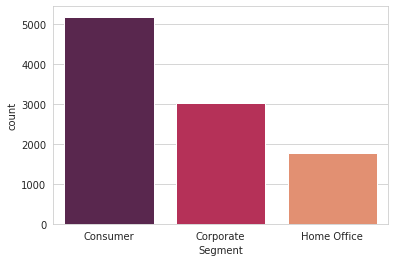

In [ ]:
import seaborn as sns

 
sns.set_style('whitegrid')
sns.countplot(x='Segment',data=df, palette='rocket')

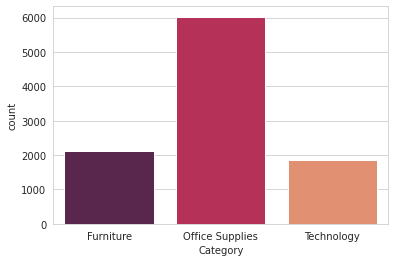

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Category',data=df, palette='rocket')

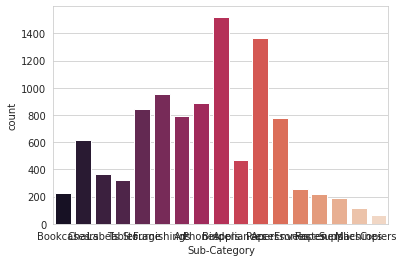

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Sub-Category',data=df, palette='rocket')

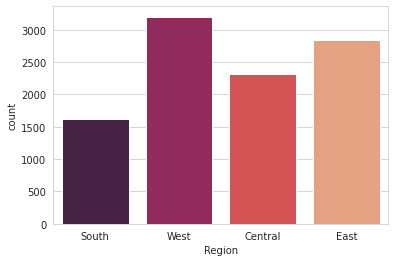

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Region',data=df, palette='rocket')

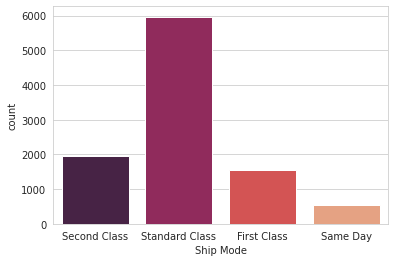

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Ship Mode',data=df, palette='rocket')

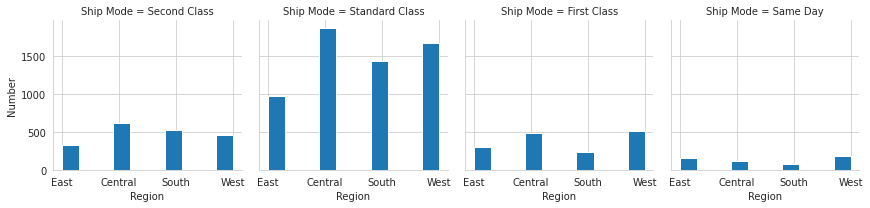

In [ ]:
region_hist = sns.FacetGrid(df, col='Ship Mode', palette='crest')
region_hist.map(plt.hist, 'Region')
region_hist.set_ylabels('Number')

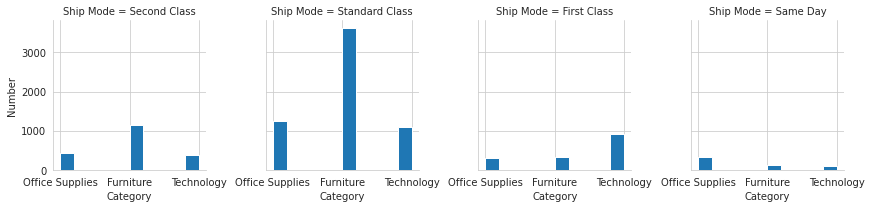

In [ ]:
region_hist = sns.FacetGrid(df, col='Ship Mode', palette='crest')
region_hist.map(plt.hist, 'Category')
region_hist.set_ylabels('Number')

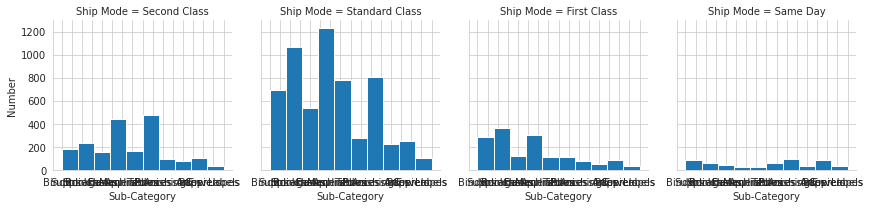

In [ ]:
region_hist = sns.FacetGrid(df, col='Ship Mode', palette='crest')
region_hist.map(plt.hist, 'Sub-Category')
region_hist.set_ylabels('Number')

Deriving the weak areas.

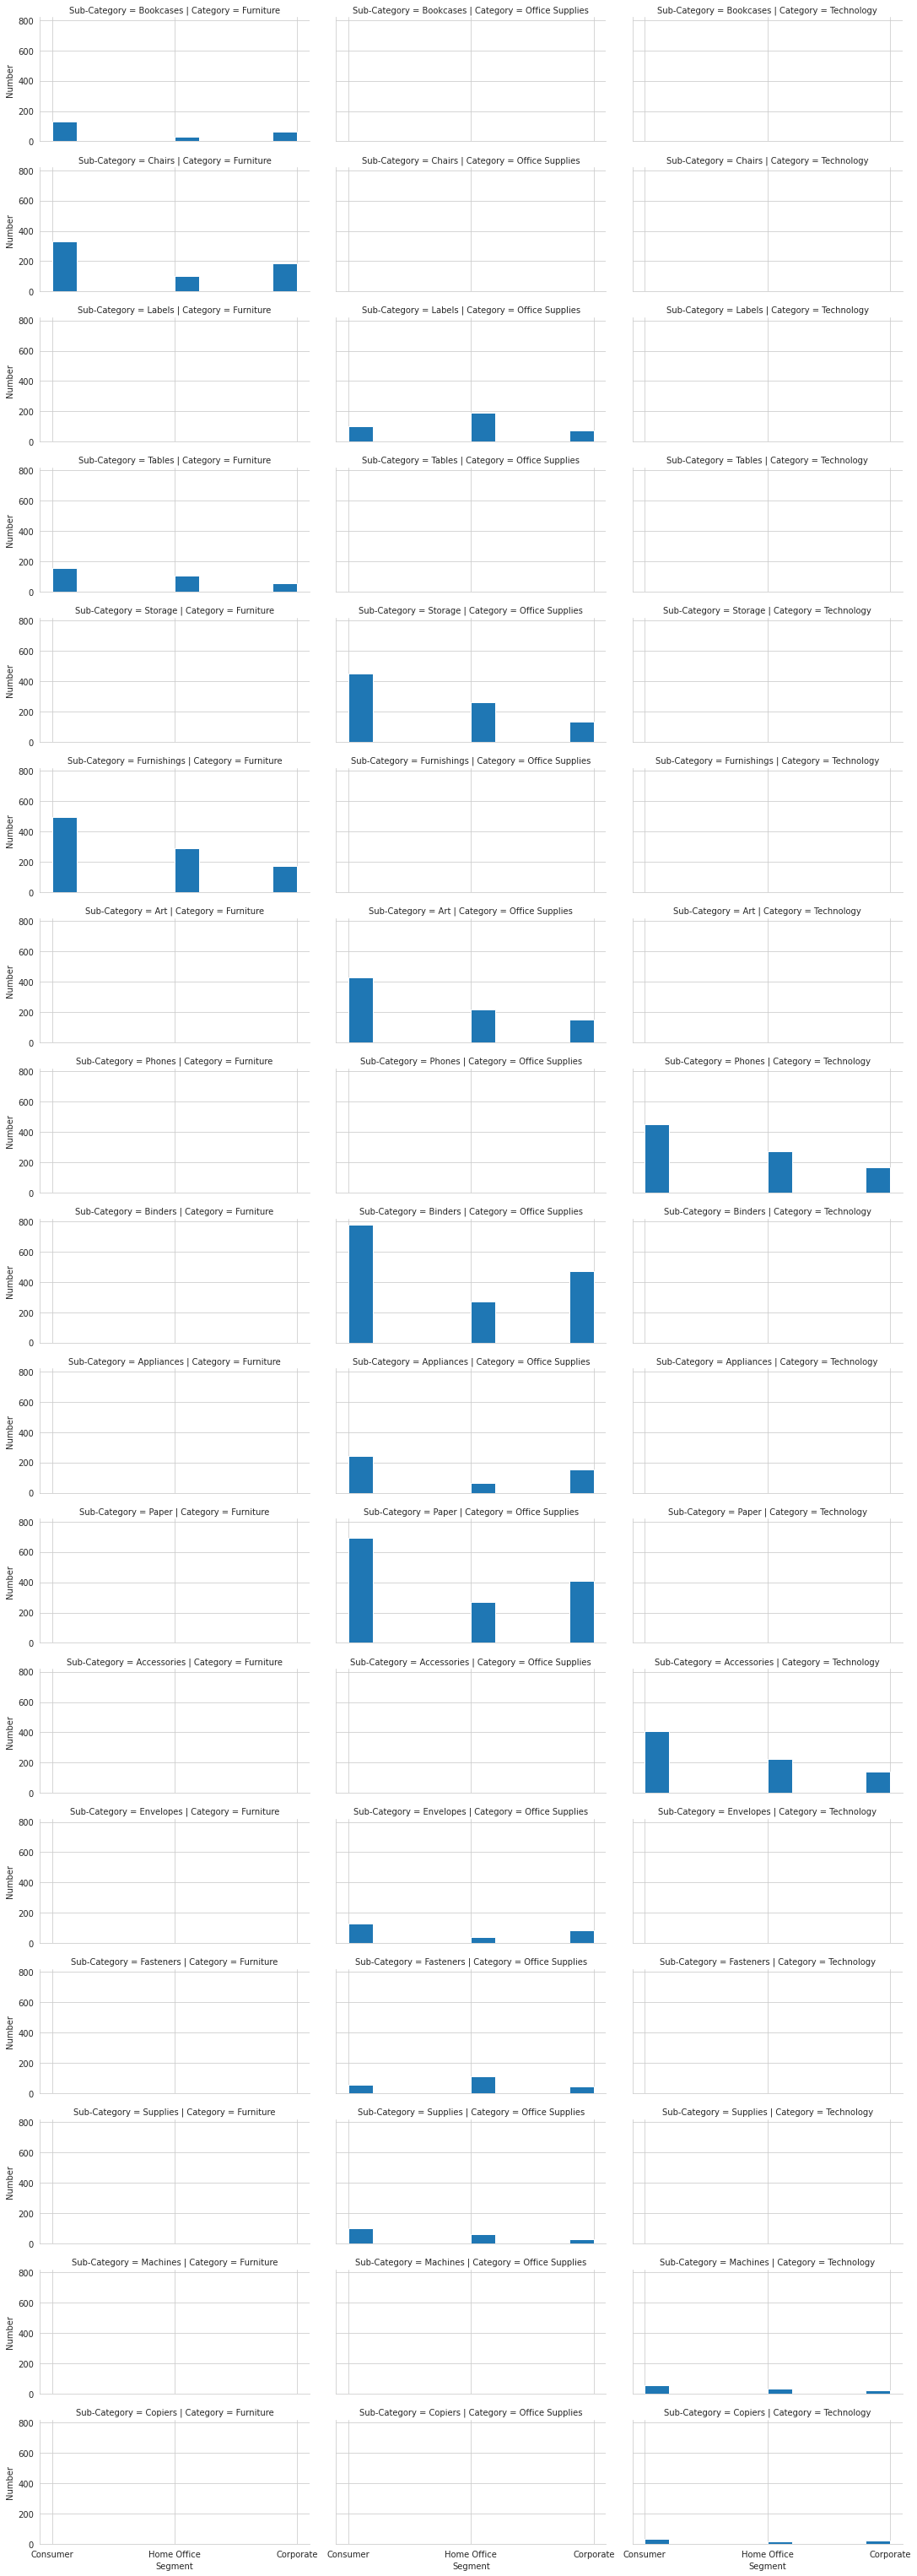

In [ ]:
pclass_age_grid = sns.FacetGrid(df, col='Category', row='Sub-Category', height=2.5, aspect=2)
pclass_age_grid.map(plt.hist, 'Segment')
pclass_age_grid.set_ylabels('Number')